In [1]:
sms_raw = read.csv('../../R_projects//MLwR/Machine Learning with R (2nd Ed.)//Chapter 04/sms_spam.csv',
                  stringsAsFactors=F)

In [2]:
str(sms_raw)

'data.frame':	5559 obs. of  2 variables:
 $ type: chr  "ham" "ham" "ham" "spam" ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or £10,000 cash needs your URGENT collection. 09066364349 NOW from Landline "| __truncated__ ...


In [3]:
sms_raw$type = factor(sms_raw$type)

In [4]:
str(sms_raw$type)

 Factor w/ 2 levels "ham","spam": 1 1 1 2 2 1 1 1 2 1 ...


In [5]:
table(sms_raw$type)


 ham spam 
4812  747 

In [6]:
library(tm)

Loading required package: NLP


In [7]:
sms_corpus = VCorpus(VectorSource(sms_raw$text))

In [8]:
print(sms_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5559


In [9]:
inspect(sms_corpus[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 49

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 23



In [10]:
as.character(sms_corpus[[1]])

[1] "Hope you are having a good week. Just checking in"

In [11]:
# display
lapply(sms_corpus[1:2], as.character)

$`1`
[1] "Hope you are having a good week. Just checking in"

$`2`
[1] "K..give back my thanks."

In [12]:
# clean up the corpus
sms_corpus_clean = tm_map(sms_corpus, content_transformer(tolower))

In [13]:
as.character(sms_corpus[[1]])
as.character(sms_corpus_clean[[1]])

[1] "Hope you are having a good week. Just checking in"

[1] "hope you are having a good week. just checking in"

In [14]:
stopwords()

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [15]:
sms_corpus_clean = tm_map(sms_corpus_clean, removeNumbers)
sms_corpus_clean = tm_map(sms_corpus_clean, removeWords, stopwords())
sms_corpus_clean = tm_map(sms_corpus_clean, removePunctuation)

In [16]:
removePunctuation('hello...world')

[1] "helloworld"

In [17]:
replacePunctuation = function(x) { gsub('[[:punct:]]+', ' ', x)}

In [18]:
replacePunctuation('hello...world')

[1] "hello world"

In [19]:
library(SnowballC)

In [20]:
wordStem(c('learn', 'learned', 'learning', 'learns'))

[1] "learn" "learn" "learn" "learn"

In [21]:
sms_corpus_clean = tm_map(sms_corpus_clean, stemDocument)

In [22]:
sms_corpus_clean = tm_map(sms_corpus_clean, stripWhitespace)

In [23]:
lapply(sms_corpus[1:3], as.character)

$`1`
[1] "Hope you are having a good week. Just checking in"

$`2`
[1] "K..give back my thanks."

$`3`
[1] "Am also doing in cbe only. But have to pay."

In [24]:
lapply(sms_corpus_clean[1:3], as.character)

$`1`
[1] "hope good week just check"

$`2`
[1] "kgive back thank"

$`3`
[1] "also cbe pay"

In [25]:
# document-term sparse matrix
sms_dtm = DocumentTermMatrix(sms_corpus_clean)

In [26]:
# alternative solution:
sms_dtm2 = DocumentTermMatrix(sms_corpus, control = list(tolower=T,
                                                        removeNumbers=T,
                                                        stopWords=T,
                                                        removePunctuation=T,
                                                        stemming=T))

In [27]:
# custom stopwords:
sms_dtm3 = DocumentTermMatrix(sms_corpus, control=list(
    tolower=T,
    removeNumbers=T,
    stopwords=function(x) { removeWords(x, stopwords()) },
    removePunctuation=T,
    stemming=T)
)

In [28]:
sms_dtm

<<DocumentTermMatrix (documents: 5559, terms: 6518)>>
Non-/sparse entries: 42113/36191449
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [29]:
sms_dtm2

<<DocumentTermMatrix (documents: 5559, terms: 6934)>>
Non-/sparse entries: 56565/38489541
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [30]:
sms_dtm3

<<DocumentTermMatrix (documents: 5559, terms: 6518)>>
Non-/sparse entries: 42113/36191449
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [31]:
# the difference comes from the ordering

In [32]:
sms_dtm_train = sms_dtm[1:4169, ]
sms_dtm_test = sms_dtm[4170:5559, ]

In [33]:
sms_train_labels = sms_raw[1:4169, ]$type
sms_test_labels = sms_raw[4170:5559, ]$type

In [34]:
prop.table(table(sms_train_labels))
prop.table(table(sms_test_labels))

sms_train_labels
      ham      spam 
0.8647158 0.1352842 

sms_test_labels
      ham      spam 
0.8683453 0.1316547 

In [35]:
library(wordcloud)

Loading required package: RColorBrewer


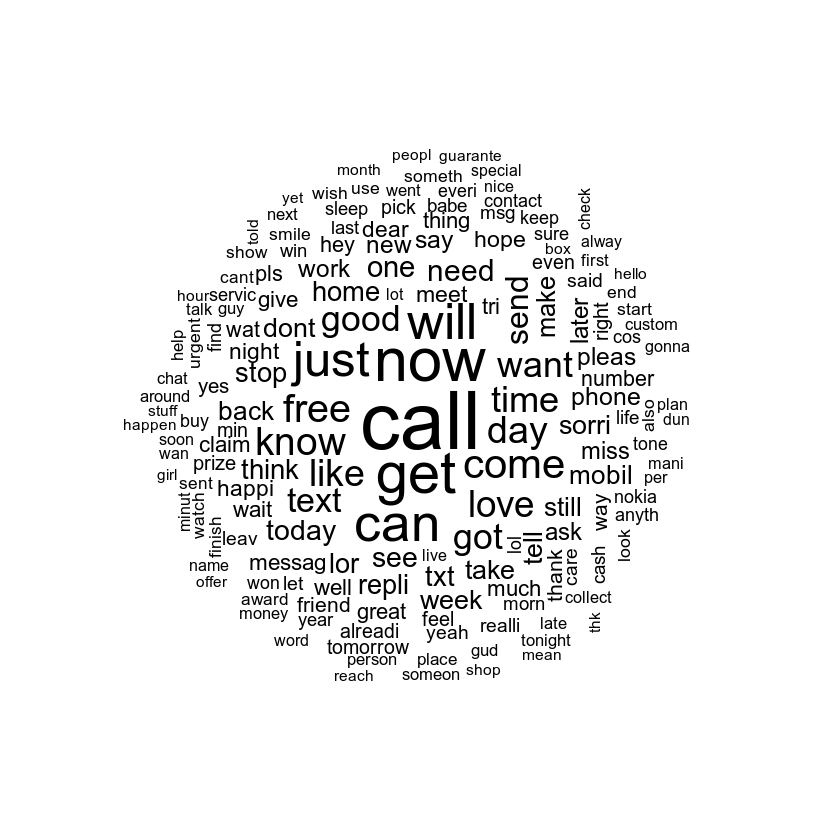

In [36]:
wordcloud(sms_corpus_clean, min.freq = 50, random.order = F)

In [37]:
spam = subset(sms_raw, type=='spam')
ham = subset(sms_raw, type=='ham')

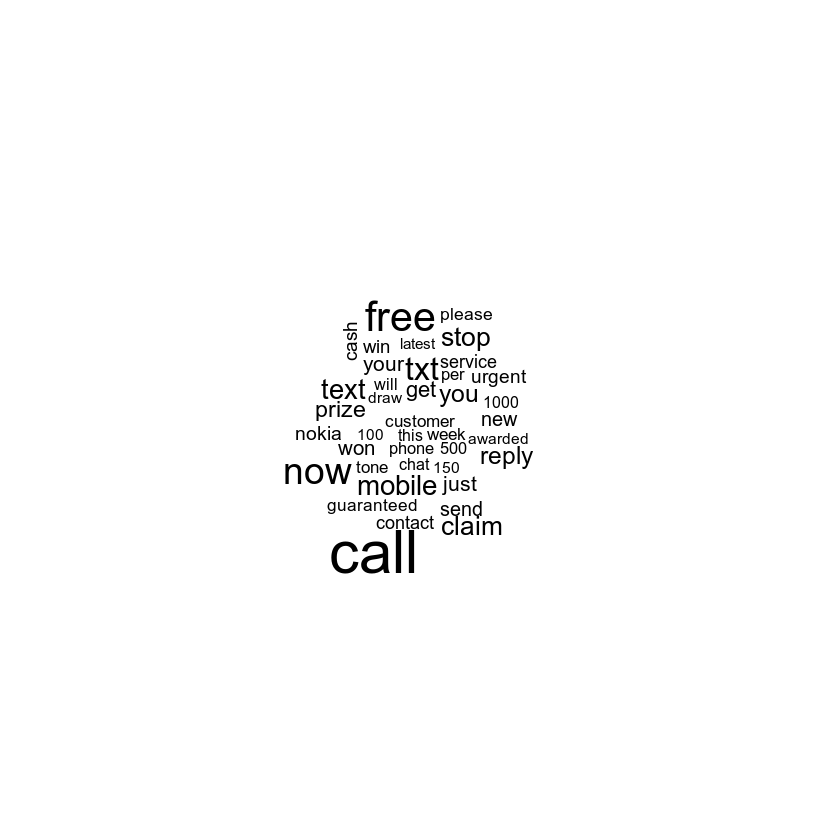

In [38]:
wordcloud(spam$text, max.words=40, scale=c(3, .5))

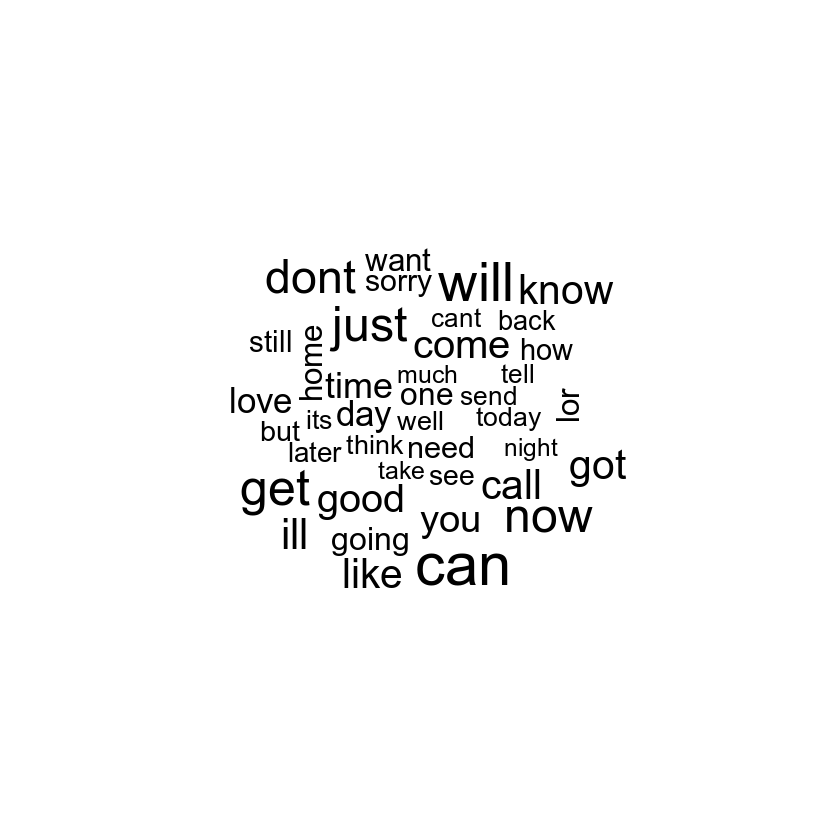

In [39]:
wordcloud(ham$text, max.words = 40, scale = c(3, .5))

In [40]:
sms_dtm_freq_train = removeSparseTerms(sms_dtm_train, .999)

In [41]:
sms_dtm_freq_train

<<DocumentTermMatrix (documents: 4169, terms: 1101)>>
Non-/sparse entries: 24834/4565235
Sparsity           : 99%
Maximal term length: 19
Weighting          : term frequency (tf)

In [42]:
findFreqTerms(sms_dtm_train, 5)

[1] "abiola"              "abl"                 "abt"                
   [4] "accept"              "access"              "account"            
   [7] "across"              "act"                 "activ"              
  [10] "actual"              "add"                 "address"            
  [13] "admir"               "adult"               "advanc"             
  [16] "aft"                 "afternoon"           "age"                
  [19] "ago"                 "aha"                 "ahead"              
  [22] "aight"               "aint"                "air"                
  [25] "aiyo"                "alex"                "almost"             
  [28] "alon"                "alreadi"             "alright"            
  [31] "also"                "alway"               "angri"              
  [34] "announc"             "anoth"               "answer"             
  [37] "anymor"              "anyon"               "anyth"              
  [40] "anytim"              "anyway"              "apart"              
  [43] "app"                 "appli"               "appreci"            
  [46] "arcad"               "ard"                 "area"               
  [49] "argu"                "argument"            "armand"             
  [52] "around"              "arrang"              "arriv"              
  [55] "asap"                "ask"                 "askd"               
  [58] "attempt"             "auction"             "avail"              
  [61] "ave"                 "avoid"               "await"              
  [64] "awak"                "award"               "away"               
  [67] "awesom"              "babe"                "babi"               
  [70] "back"                "bad"                 "bag"                
  [73] "bank"                "bare"                "basic"              
  [76] "bath"                "batteri"             "bcoz"               
  [79] "bday"                "beauti"              "becom"              
  [82] "bed"                 "bedroom"             "beer"               
  [85] "begin"               "believ"              "best"               
  [88] "better"              "bid"                 "big"                
  [91] "bill"                "bird"                "birthday"           
  [94] "bit"                 "black"               "blank"              
  [97] "bless"               "blue"                "bluetooth"          
 [100] "bold"                "bonus"               "boo"                
 [103] "book"                "boost"               "bore"               
 [106] "boss"                "bother"              "bout"               
 [109] "box"                 "boy"                 "boytoy"             
 [112] "break"               "breath"              "bring"              
 [115] "brother"             "bslvyl"              "btnationalr"        
 [118] "buck"                "bus"                 "busi"               
 [121] "buy"                 "cabin"               "call"               
 [124] "caller"              "callertun"           "camcord"            
 [127] "came"                "camera"              "campus"             
 [130] "can"                 "cancel"              "cancer"             
 [133] "cant"                "car"                 "card"               
 [136] "care"                "carlo"               "case"               
 [139] "cash"                "cashbal"             "catch"              
 [142] "caus"                "celebr"              "cell"               
 [145] "centr"               "chanc"               "chang"              
 [148] "charg"               "chat"                "cheap"              
 [151] "cheaper"             "check"               "cheer"              
 [154] "chennai"             "chikku"              "childish"           
 [157] "children"            "choic"               "choos"              
 [160] "christma"            "claim"               "class"              
 [163] "clean"               "clear"               "close"   

In [43]:
sms_freq_words = findFreqTerms(sms_dtm_train, 5)

In [44]:
str(sms_freq_words)

 chr [1:1136] "abiola" "abl" "abt" "accept" "access" "account" "across" ...


In [45]:
sms_dtm_freq_train = sms_dtm_train[, sms_freq_words]
sms_dtm_freq_test = sms_dtm_test[, sms_freq_words]

In [46]:
convert_counts = function(x) {
    x = ifelse(x > 0, 'Yes', 'No')
}

In [57]:
sms_train = apply(sms_dtm_freq_train, MARGIN=2, convert_counts)
sms_test  = apply(sms_dtm_freq_test, MARGIN=2, convert_counts)

In [58]:
library(e1071)

In [59]:
sms_classifier = naiveBayes(sms_train, sms_train_labels)

In [60]:
sms_test_pred = predict(sms_classifier, sms_test)

In [61]:
library(gmodels)

In [62]:
CrossTable(sms_test_pred, sms_test_labels, prop.chisq=F,
           prop.t=F, prop.r = F, dnn=c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1201 |        30 |      1231 | 
             |     0.995 |     0.164 |           | 
-------------|-----------|-----------|-----------|
        spam |         6 |       153 |       159 | 
             |     0.005 |     0.836 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 


In [63]:
sms_classifier2 = naiveBayes(sms_train, sms_train_labels, laplace = 1)

In [64]:
sms_test_pred2 = predict(sms_classifier2, sms_test)

In [65]:
CrossTable(sms_test_pred2, sms_test_labels, prop.chisq=F, prop.t=F,
          prop.r=F, dnn=c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | actual 
   predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1202 |        28 |      1230 | 
             |     0.996 |     0.153 |           | 
-------------|-----------|-----------|-----------|
        spam |         5 |       155 |       160 | 
             |     0.004 |     0.847 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1207 |       183 |      1390 | 
             |     0.868 |     0.132 |           | 
-------------|-----------|-----------|-----------|

 


In [90]:
# bayesian classifiers:
# >text classification
# >intrusion/anomaly detection
# >diagnosing medical conditions given symptoms
# simple, fast, effective
# does well with noise and missing data
# requires few examples
# easy to obrain probability

# relies on assumption of equally important and independent features
# not ideal for data with many numeric features

# laplace estimator - add a small value to avoid zeros when multiplying

# frequency table -> likelihood table -> multiply conditional probabilities
# according to Naive Baye's rule -> divide by the total likelihood to
# transform each class likelihood into a probability

$$P(A|B) =  \frac{P(A \cap B)}{P(B)} = \frac{P(B|A) P(A)}{P(B)}$$

$$P(Viagra|spam) = likelihood$$

$$P(Viagra) = marginal\ likelihood$$

$$P(spam|Viagra) = posterior$$

$$P(Viagra) = prior$$

$$P(spam|Viagra) =  \frac{P(Viagra | spam) P(spam)}{P(spam)}$$